In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#COLLECTING THE DATA
dataset= ("G:/.shortcut-targets-by-id/1ppkxhk1_i1qkagib3HrczZa5MYHb9N5V/BUA 500 Project/Presentation/Original 200 forbes global 2022(2000 companies) - companies - forbes global 2022(2000 companies) - companies.csv")

In [3]:
df= pd.read_csv(dataset)
type(df)

pandas.core.frame.DataFrame

In [4]:
#Original table to be cleaned
df.head(20)

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions
0,1,Berkshire Hathaway,United States,$276.09 B,$89.8 B,$958.78 B,$741.48 B
1,2,ICBC,China,$208.13 B,$54.03 B,"$5,518.51 B",$214.43 B
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$400.38 B,$105.36 B,$576.04 B,"$2,292.08 B"
3,4,JPMorgan Chase,United States,$124.54 B,$42.12 B,"$3,954.69 B",$374.45 B
4,5,China Construction Bank,China,$202.07 B,$46.89 B,"$4,746.95 B",$181.32 B
5,6,Amazon,United States,$469.82 B,$33.36 B,$420.55 B,"$1,468.4 B"
6,7,Apple,United States,$378.7 B,$100.56 B,$381.19 B,"$2,640.32 B"
7,8,Agricultural Bank of China,China,$181.42 B,$37.38 B,"$4,561.05 B",$133.38 B
8,9,Bank of America,United States,$96.83 B,$31 B,"$3,238.22 B",$303.1 B
9,10,Toyota Motor,Japan,$281.75 B,$28.15 B,$552.46 B,$237.73 B


In [5]:
# checking for missing data

# counting the number of missing values in each column
df_number= df.isnull().sum()
print(df_number)

# replacing the missing data with 0
df = df.fillna(0)

df.head(200)

rank                    0
global company          0
country                 0
sales_billions          0
profit_billions         0
assets_billions         0
marketValue_billions    0
dtype: int64


,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions
0,1,Berkshire Hathaway,United States,$276.09 B,$89.8 B,$958.78 B,$741.48 B
1,2,ICBC,China,$208.13 B,$54.03 B,"$5,518.51 B",$214.43 B
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$400.38 B,$105.36 B,$576.04 B,"$2,292.08 B"
3,4,JPMorgan Chase,United States,$124.54 B,$42.12 B,"$3,954.69 B",$374.45 B
4,5,China Construction Bank,China,$202.07 B,$46.89 B,"$4,746.95 B",$181.32 B
...,...,...,...,...,...,...,...
195,195,Telefónica,Spain,$46.42 B,$9.4 B,$124.2 B,$29.44 B
196,197,China Vanke,China,$71.42 B,$3.5 B,$304.19 B,$27.92 B
197,198,NAB - National Australia Bank,Australia,$15.76 B,$4.78 B,$669.03 B,$77.24 B
198,199,Cathay Financial,Taiwan,$34.46 B,$4.99 B,$418.7 B,$28.9 B


In [6]:
#CLEANING THE DATA
# 1. define a function with what we need
def clean_number(number):
    number= number[1:-2] # remove first and last characters
    number= number.replace(",","") # remove commas
    number= float(number) #change from string to float
    number= round(number,1) #round to 1 decimal
    return (number)

# 2. specify the columns to clean
cols_to_clean=["sales_billions","profit_billions","assets_billions","marketValue_billions"]

# 3. apply the clean_number function to the specified columns using apply()
#df_cleaned is the name for the "new" cleaned dateset
df_cleaned= df[cols_to_clean].apply(lambda col: col.apply(clean_number))

# 4. combine the cleaned columns with the original dataframe
df_cleaned= pd.concat([df.drop(cols_to_clean, axis=1), df_cleaned], axis=1) 

In [7]:
df_cleaned.head(201)

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions
0,1,Berkshire Hathaway,United States,276.1,89.8,958.8,741.5
1,2,ICBC,China,208.1,54.0,5518.5,214.4
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.4,105.4,576.0,2292.1
3,4,JPMorgan Chase,United States,124.5,42.1,3954.7,374.4
4,5,China Construction Bank,China,202.1,46.9,4746.9,181.3
...,...,...,...,...,...,...,...
195,195,Telefónica,Spain,46.4,9.4,124.2,29.4
196,197,China Vanke,China,71.4,3.5,304.2,27.9
197,198,NAB - National Australia Bank,Australia,15.8,4.8,669.0,77.2
198,199,Cathay Financial,Taiwan,34.5,5.0,418.7,28.9


In [8]:
#PREPARING DATA FOR ANALYSIS

#Adding the financial ratios to the the table

#Adding a new column / calculation of the ratio/ Rounding the float number to 1 decimal 
df_cleaned["Profit_margin%"]= ((df_cleaned["profit_billions"]/df_cleaned["sales_billions"])*100).round(1)
df_cleaned["Price_to_sales"]= (df_cleaned["marketValue_billions"]/df_cleaned["sales_billions"]).round(1)
df_cleaned["return_on_assets%"]= ((df_cleaned["profit_billions"]/df_cleaned["assets_billions"])*100).round(1)

df_cleaned.head(200)

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions,Profit_margin%,Price_to_sales,return_on_assets%
0,1,Berkshire Hathaway,United States,276.1,89.8,958.8,741.5,32.5,2.7,9.4
1,2,ICBC,China,208.1,54.0,5518.5,214.4,25.9,1.0,1.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.4,105.4,576.0,2292.1,26.3,5.7,18.3
3,4,JPMorgan Chase,United States,124.5,42.1,3954.7,374.4,33.8,3.0,1.1
4,5,China Construction Bank,China,202.1,46.9,4746.9,181.3,23.2,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...
195,195,Telefónica,Spain,46.4,9.4,124.2,29.4,20.3,0.6,7.6
196,197,China Vanke,China,71.4,3.5,304.2,27.9,4.9,0.4,1.2
197,198,NAB - National Australia Bank,Australia,15.8,4.8,669.0,77.2,30.4,4.9,0.7
198,199,Cathay Financial,Taiwan,34.5,5.0,418.7,28.9,14.5,0.8,1.2


In [9]:
#ANALYZE THE DATA

#Definining the total market cap for the 200 largest companies in the world.
total_marketcap = df_cleaned['marketValue_billions'].sum()
print("The total market capitalization of the 200 largest companies in the US is $", total_marketcap, "billions")

The total market capitalization of the 200 largest companies in the US is $ 36006.0 billions


In [10]:
#Creating a group (groupby) and sorting it in descending
#We are defining here how much participation in the 200 largest companies in the world the top 10 countries have (number)
countries= (df_cleaned.groupby("country")["marketValue_billions"].sum().sort_values(ascending=False))
countries = countries.head(10)
countries.head(10)

country
United States     21578.7
China              2321.6
Saudi Arabia       2292.1
United Kingdom     1178.0
Switzerland        1161.4
Japan              1036.1
France              900.5
Germany             798.1
Canada              697.0
Taiwan              603.1
Name: marketValue_billions, dtype: float64

Text(0, 0.5, '% of total market cap')

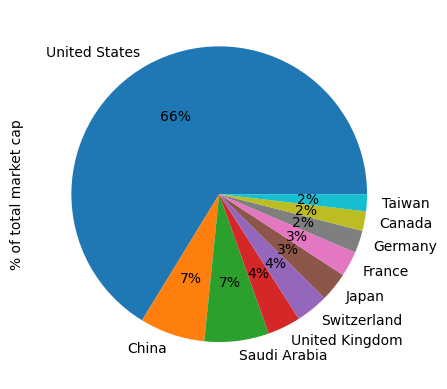

In [11]:
countries.plot (x="country",y="marketValue_billions", kind="pie",autopct='%1.0f%%')
plt.ylabel("% of total market cap")
#The US has 66% of the total market in the top 10 countries with the highest market cap in the world. 

In [12]:
#Creating a new table with the top 20 companies
df_top20 = df_cleaned.head(20)
df_top20.head(20)

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions,Profit_margin%,Price_to_sales,return_on_assets%
0,1,Berkshire Hathaway,United States,276.1,89.8,958.8,741.5,32.5,2.7,9.4
1,2,ICBC,China,208.1,54.0,5518.5,214.4,25.9,1.0,1.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.4,105.4,576.0,2292.1,26.3,5.7,18.3
3,4,JPMorgan Chase,United States,124.5,42.1,3954.7,374.4,33.8,3.0,1.1
4,5,China Construction Bank,China,202.1,46.9,4746.9,181.3,23.2,0.9,1.0
5,6,Amazon,United States,469.8,33.4,420.6,1468.4,7.1,3.1,7.9
6,7,Apple,United States,378.7,100.6,381.2,2640.3,26.6,7.0,26.4
7,8,Agricultural Bank of China,China,181.4,37.4,4561.1,133.4,20.6,0.7,0.8
8,9,Bank of America,United States,96.8,31.0,3238.2,303.1,32.0,3.1,1.0
9,10,Toyota Motor,Japan,281.8,28.1,552.5,237.7,10.0,0.8,5.1


<AxesSubplot:xlabel='global company'>

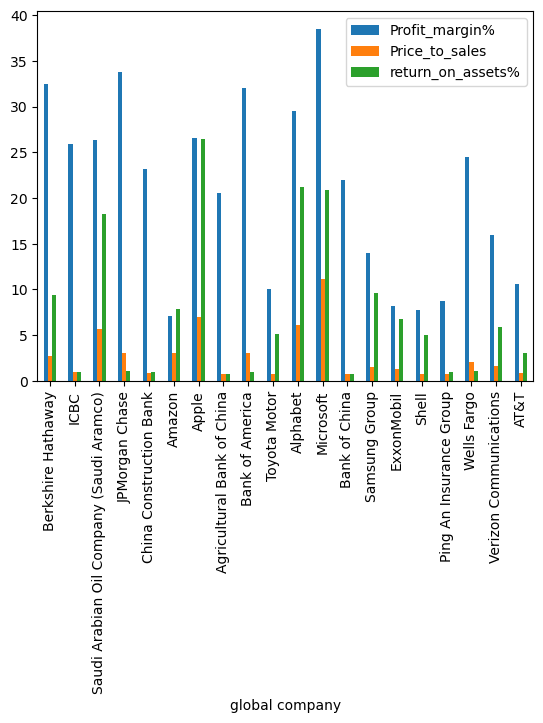

In [13]:
#Visualization of the ratios of the top 20 companies in the Forbes 2022 list. 
df_top20.plot(x="global company", y=["Profit_margin%", "Price_to_sales", "return_on_assets%"], kind="bar")

In [14]:
#Creating a new table for the bottom 20 companies
df_bottom20 = df_cleaned.tail(20)
df_bottom20.head(20)

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions,Profit_margin%,Price_to_sales,return_on_assets%
180,181,Banco Bradesco,Brazil,28.3,4.1,296.9,43.2,14.5,1.5,1.4
181,182,Accenture,Ireland,56.7,6.4,44.3,196.9,11.3,3.5,14.4
182,183,ING Group,Netherlands,21.5,5.7,1081.8,39.0,26.5,1.8,0.5
183,184,Honeywell International,United States,34.4,5.5,64.5,130.7,16.0,3.8,8.5
184,185,Mizuho Financial,Japan,26.8,5.4,1957.6,31.4,20.1,1.2,0.3
185,186,Linde,United Kingdom,30.8,3.8,81.6,157.3,12.3,5.1,4.7
186,187,ArcelorMittal,Luxembourg,76.7,15.0,90.5,29.0,19.6,0.4,16.6
187,188,Canadian Imperial Bank,Canada,18.7,5.3,677.5,51.2,28.3,2.7,0.8
188,189,Poly Developments & Holdings Group,China,42.9,4.2,219.7,32.8,9.8,0.8,1.9
189,190,Micron Technology,United States,31.2,9.0,63.7,77.5,28.8,2.5,14.1


<AxesSubplot:xlabel='global company'>

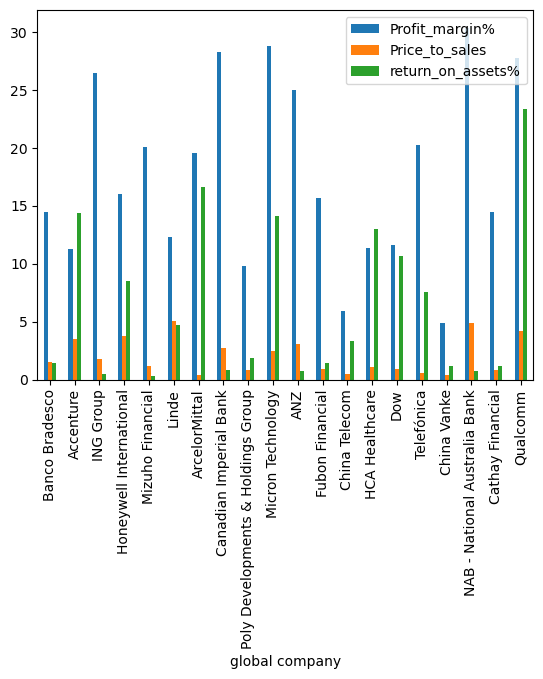

In [15]:
#Visualization of the ratios of the top 20 companies in the Forbes 2022 list. 
df_bottom20.plot(x="global company", y=["Profit_margin%", "Price_to_sales", "return_on_assets%"], kind="bar")

In [16]:
#Visualization of the ratios of the top 20 companies in the Forbes 2022 list. 
#Comparing companies in the same industry (IT, Internet, Software & Services) Alphabet vs Microsoft
       
df_Alp_Micro= df_top20.loc[[10,11]]

df_Alp_Micro.head()

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions,Profit_margin%,Price_to_sales,return_on_assets%
10,11,Alphabet,United States,257.5,76.0,359.3,1581.7,29.5,6.1,21.2
11,12,Microsoft,United States,184.9,71.2,340.4,2054.4,38.5,11.1,20.9


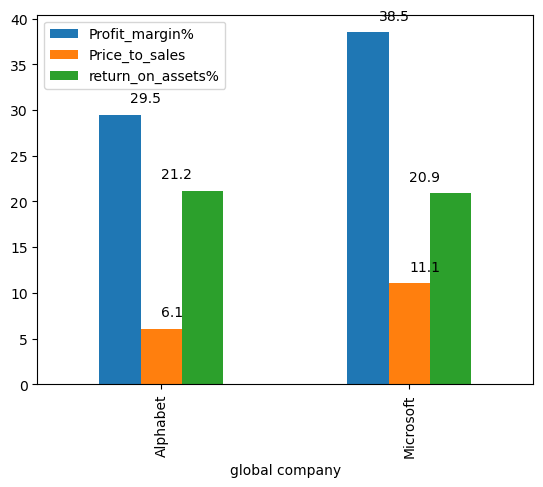

In [17]:
ax = df_Alp_Micro.plot(x='global company', y=["Profit_margin%", "Price_to_sales", "return_on_assets%"], kind="bar")

#displaying the values on the chart
for i, v in enumerate(df_Alp_Micro["Profit_margin%"]):
    ax.text(i, v + 1, str(v), ha='right', va='bottom')
for i, v in enumerate(df_Alp_Micro["Price_to_sales"]):
    ax.text(i, v + 1, str(v), ha="left", va='bottom')
for i, v in enumerate(df_Alp_Micro["return_on_assets%"]):
    ax.text(i, v + 1, str(v), ha='left', va='bottom')      

In [18]:
#Visualization of the ratios of the banking companies JP Morgan and Bank of America. 
       
df_JP_BoA= df_top20.loc[[3,8]]

df_JP_BoA.head()

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions,Profit_margin%,Price_to_sales,return_on_assets%
3,4,JPMorgan Chase,United States,124.5,42.1,3954.7,374.4,33.8,3.0,1.1
8,9,Bank of America,United States,96.8,31.0,3238.2,303.1,32.0,3.1,1.0


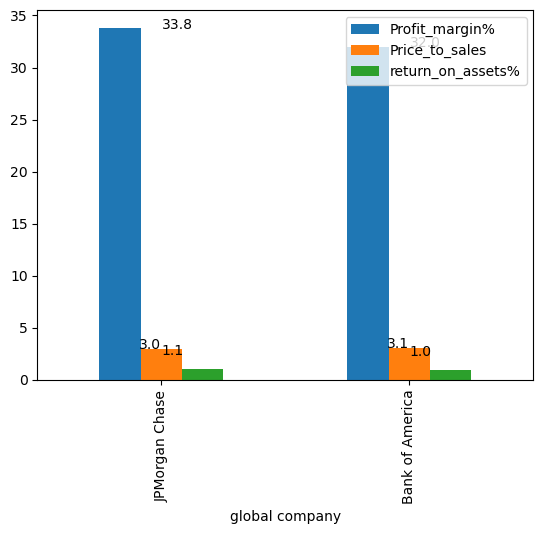

In [19]:
ax = df_JP_BoA.plot(x='global company', y=["Profit_margin%", "Price_to_sales", "return_on_assets%"], kind="bar")

#displaying the values on the chart

for i, v in enumerate(df_JP_BoA["Profit_margin%"]):
    ax.text(i, v + 1, str(v), ha='left', va='top')
for i, v in enumerate(df_JP_BoA["Price_to_sales"]):
    ax.text(i, v + 1, str(v), ha="right", va='top')
for i, v in enumerate(df_JP_BoA["return_on_assets%"]):
    ax.text(i, v + 1, str(v), ha='left', va='bottom')  

In [20]:
#Visualization of the ratios of the Telecommunications Services companies on the top 20 and bottom 20. 
#AT&T, Telefonica and China Telecom. 
       
df_Tele= df_cleaned.loc[[19,195,192]]

df_Tele.head()

,rank,global company,country,sales_billions,profit_billions,assets_billions,marketValue_billions,Profit_margin%,Price_to_sales,return_on_assets%
19,20,AT&T,United States,163.0,17.3,551.6,141.8,10.6,0.9,3.1
195,195,Telefónica,Spain,46.4,9.4,124.2,29.4,20.3,0.6,7.6
192,193,China Telecom,China,68.2,4.0,121.1,35.2,5.9,0.5,3.3


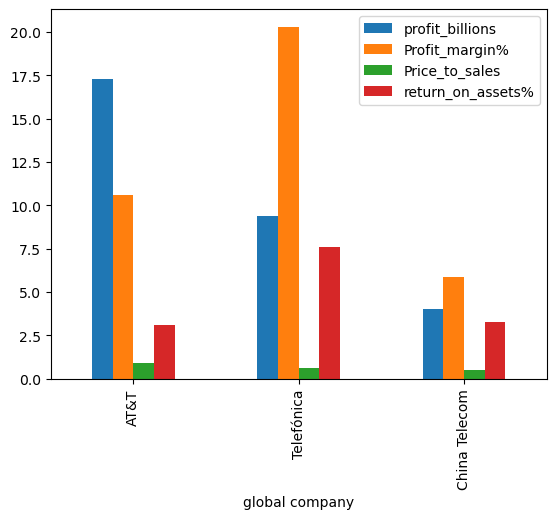

In [29]:
ax = df_Tele.plot(x='global company', y=["profit_billions","Profit_margin%", "Price_to_sales", "return_on_assets%"], kind="bar")